In [12]:

import rtree, pygeos
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import os
import folium

import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import statsmodels.api as sm

In [13]:
#os.listdir('/dbfs/FileStore/mike.hudgell@os.uk/')

data_path = 'C:/Users/mhudgell/data/'
os.listdir(data_path)

['dft-road-casualty-statistics-accident-last-5-years.csv',
 'dft-road-casualty-statistics-casualty-last-5-years.csv',
 'dft-road-casualty-statistics-vehicle-last-5-years.csv',
 'OS VectorMap District (ESRI Shape File) SU',
 'PFA_DEC_2021_EW_BGC.cpg',
 'PFA_DEC_2021_EW_BGC.dbf',
 'PFA_DEC_2021_EW_BGC.prj',
 'PFA_DEC_2021_EW_BGC.shp',
 'PFA_DEC_2021_EW_BGC.shx',
 'Police_Force_Areas_(December_2021)_EW_BGC.xml']

In [14]:
file_path = data_path +'dft-road-casualty-statistics-accident-last-5-years.csv'
print(file_path)
rta = pd.read_csv(file_path)

C:/Users/mhudgell/data/dft-road-casualty-statistics-accident-last-5-years.csv


C:\Users\mhudgell\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
rta.head(2)

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2016010000005,2016,010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,...,0,5,1,1,0,0,1,1,2,E01000543
1,2016010000006,2016,010000006,551920.0,174560.0,0.184928,51.449595,1,3,1,...,0,4,1,1,0,0,1,1,2,E01000375


In [16]:
geometry = [Point(xy) for xy in zip(rta.location_easting_osgr, rta.location_northing_osgr)]
crs = {'init': 'epsg:27700'} #4326
rta_gdf = gpd.GeoDataFrame(rta, crs=crs, geometry=geometry)

C:\Anaconda3\envs\geo37\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

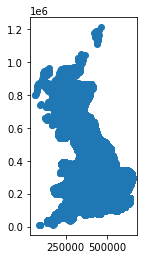

In [17]:
rta_gdf.plot()

In [18]:
police_areas_gdf = gpd.read_file(data_path + 'PFA_DEC_2021_EW_BGC.shp')

<AxesSubplot:>

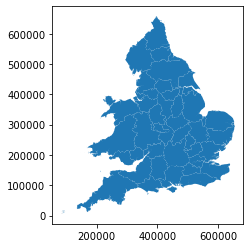

In [19]:
police_areas_gdf.plot()

In [73]:
sussex_poly = police_areas_gdf.loc[police_areas_gdf['PFA21NM'] == 'Sussex'] #.geometry

<AxesSubplot:>

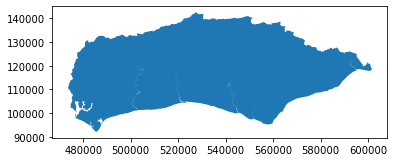

In [74]:
sussex_poly.plot()

In [75]:
rta_gdf

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,geometry
0,2016010000005,2016,010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,...,5,1,1,0,0,1,1,2,E01000543,POINT (519310.000 188730.000)
1,2016010000006,2016,010000006,551920.0,174560.0,0.184928,51.449595,1,3,1,...,4,1,1,0,0,1,1,2,E01000375,POINT (551920.000 174560.000)
2,2016010000008,2016,010000008,505930.0,183850.0,-0.473837,51.543563,1,3,1,...,4,1,1,0,0,1,1,2,E01033725,POINT (505930.000 183850.000)
3,2016010000016,2016,010000016,527770.0,168930.0,-0.164442,51.404958,1,3,1,...,1,1,1,0,0,1,1,2,E01003379,POINT (527770.000 168930.000)
4,2016010000018,2016,010000018,510740.0,177230.0,-0.406580,51.483139,1,3,2,...,1,1,1,0,0,1,1,2,E01002583,POINT (510740.000 177230.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597968,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,1,1,1,0,0,1,1,-1,-1,POINT (343034.000 731654.000)
597969,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,1,1,1,0,0,1,2,-1,-1,POINT (257963.000 658891.000)
597970,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,1,1,1,0,0,2,1,-1,-1,POINT (383664.000 810646.000)
597971,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,1,1,1,0,0,1,2,-1,-1,POINT (277161.000 674852.000)


In [76]:
sussex_poly

,OBJECTID,PFA21CD,PFA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,SHAPE_Leng,SHAPE_Area,geometry
32,33,E23000033,Sussex,556570,117296,0.226848,50.933861,{2A204699-2B56-42AD-B396-7F535D40D5FB},711999.620282,3.786718e+09,"MULTIPOLYGON (((483325.407 94764.633, 483268.2..."


In [77]:

sussex_rta = gpd.sjoin(rta_gdf, sussex_poly, how="inner")

<AxesSubplot:>

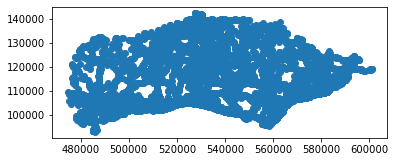

In [78]:
sussex_rta.plot()

In [79]:
sussex_rta.head(1)

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,OBJECTID,PFA21CD,PFA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,SHAPE_Leng,SHAPE_Area
108207,2016471600009,2016,471600009,510617.0,102999.0,-0.431144,50.815918,47,3,3,...,33,E23000033,Sussex,556570,117296,0.226848,50.933861,{2A204699-2B56-42AD-B396-7F535D40D5FB},711999.620282,3.786718e+09


In [80]:
sussex_rta.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,...,did_police_officer_attend_scene_of_accident,trunk_road_flag,index_right,OBJECTID,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area
count,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.00000,18991.000000,...,18991.000000,18991.000000,18991.0,18991.0,18991.0,18991.0,1.899100e+04,18991.000000,1.899100e+04,1.899100e+04
mean,2017.894845,532337.232005,113084.936022,-0.119320,50.901471,46.999947,2.742615,1.903165,1.31020,4.104629,...,1.255911,1.896899,32.0,33.0,556570.0,117296.0,2.268480e-01,50.933861,7.119996e+05,3.786718e+09
std,1.389326,26128.888034,12000.760736,0.371476,0.107758,0.007256,0.463968,0.742132,0.72289,1.916546,...,0.436383,0.304099,0.0,0.0,0.0,0.0,5.551261e-17,0.000000,6.333160e-08,1.167328e-03
min,2016.000000,474542.000000,92829.000000,-0.941778,50.728749,46.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,32.0,33.0,556570.0,117296.0,2.268480e-01,50.933861,7.119996e+05,3.786718e+09
25%,2017.000000,515502.000000,104353.500000,-0.359239,50.824784,47.000000,3.000000,1.000000,1.00000,2.000000,...,1.000000,2.000000,32.0,33.0,556570.0,117296.0,2.268480e-01,50.933861,7.119996e+05,3.786718e+09
50%,2018.000000,530143.000000,107882.000000,-0.150394,50.852626,47.000000,3.000000,2.000000,1.00000,4.000000,...,1.000000,2.000000,32.0,33.0,556570.0,117296.0,2.268480e-01,50.933861,7.119996e+05,3.786718e+09
75%,2019.000000,550442.000000,121358.500000,0.139809,50.973178,47.000000,3.000000,2.000000,1.00000,6.000000,...,2.000000,2.000000,32.0,33.0,556570.0,117296.0,2.268480e-01,50.933861,7.119996e+05,3.786718e+09
max,2020.000000,601302.000000,142472.000000,0.863607,51.167286,47.000000,3.000000,14.000000,12.00000,7.000000,...,2.000000,2.000000,32.0,33.0,556570.0,117296.0,2.268480e-01,50.933861,7.119996e+05,3.786718e+09


In [82]:



sussex_rta['date_time'] = sussex_rta['date'] + " " + sussex_rta['time']
sussex_rta['date_time'] = sussex_rta['date_time'] = pd.to_datetime(sussex_rta['date_time'], format="%d/%m/%Y %H:%M")
sussex_rta['ddate'] = sussex_rta['date_time'].dt.date
sussex_rta['day_of_week'] = sussex_rta['date_time'].dt.day_of_week
sussex_rta['month'] = sussex_rta['date_time'].dt.month
sussex_rta['hour'] = sussex_rta['date_time'].dt.hour
sussex_rta['minute'] = sussex_rta['date_time'].dt.minute
sussex_rta['day_of_year'] = sussex_rta['date_time'].dt.day_of_year
sussex_rta['week_number'] = sussex_rta['date_time'].dt.week
sussex_rta['time'] = sussex_rta['date_time'].dt.time
sussex_rta['number_of_vehicles'] = sussex_rta['number_of_vehicles'].astype(int)
sussex_rta['number_of_casualties'] = sussex_rta['number_of_casualties'].astype(int)


C:\Users\mhudgell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == "__main__":


In [86]:
analysis_rta_df = sussex_rta[['hour', 'day_of_year']]
analysis_rta_df['min_of_day'] = sussex_rta['hour']*60 + sussex_rta['minute']

C:\Users\mhudgell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [87]:
analysis_rta_df.describe()

,hour,day_of_year,min_of_day
count,18991.000000,18991.000000,18991.000000
mean,13.412459,186.101574,832.139750
std,4.981230,104.469704,298.452506
min,0.000000,1.000000,0.000000
25%,10.000000,95.000000,604.000000
50%,14.000000,190.000000,863.000000
75%,17.000000,275.000000,1055.000000
max,23.000000,366.000000,1439.000000


In [88]:
y = analysis_rta_df['min_of_day']
 
x1 = analysis_rta_df['day_of_year']

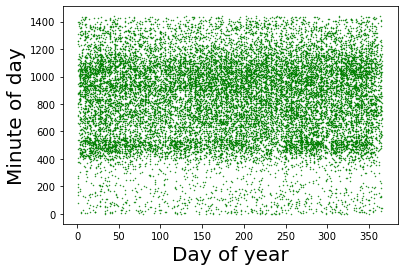

In [93]:
plt.scatter(x1,y, s=.2, c='g')
 
plt.xlabel('Day of year', fontsize = 20)
 
plt.ylabel('Minute of day', fontsize = 20)
 
plt.show()

In [94]:
x = sm.add_constant(x1)
 
results = sm.OLS(y,x).fit()
 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             min_of_day   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5170
Date:                Sun, 16 Oct 2022   Prob (F-statistic):              0.472
Time:                        11:54:46   Log-Likelihood:            -1.3517e+05
No. Observations:               18991   AIC:                         2.703e+05
Df Residuals:                   18989   BIC:                         2.704e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         829.3657      4.424    187.451      0.000     820.693     838.038
day_of_year     0.0149      0.021      0.719      0.472      -0.026       0.056
==============================================================================
Omnibus:                      429.174   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              420.930
Skew:                          -0.334   Prob(JB):                     3.95e-92
Kurtosis:                       2.706   Cond. No.                         436.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""